# Task 3

In [97]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage.util import img_as_float


%matplotlib inline


In [98]:
#Test image
img = img_as_float(mpimg.imread('castle.jpg'))
h, w, d = original_shape = tuple(img.shape)
# plt.imshow(img,cmap="gray")

#1. Implement the SLIC method (from skimage)


In [99]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries


#3.Comparison of different weights

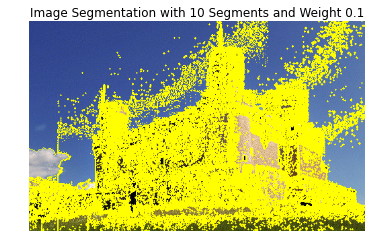

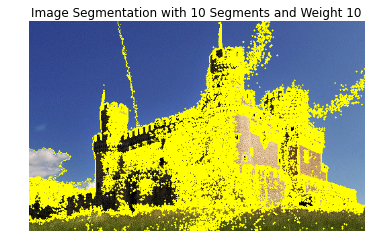

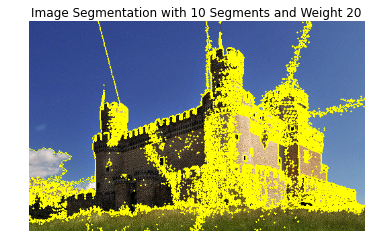

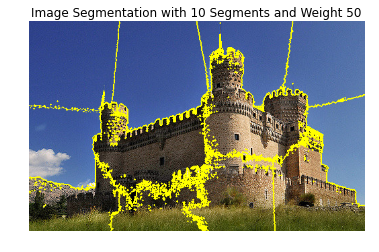

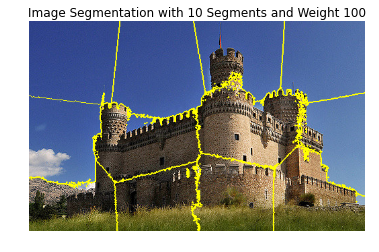

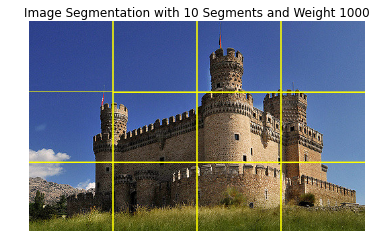

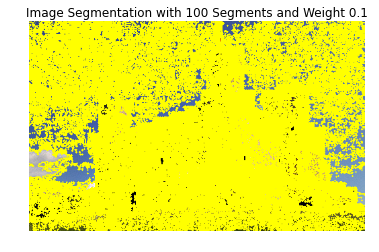

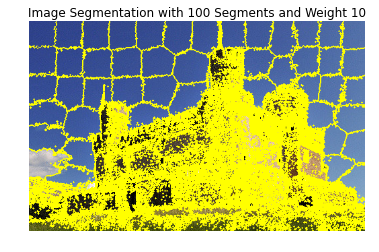

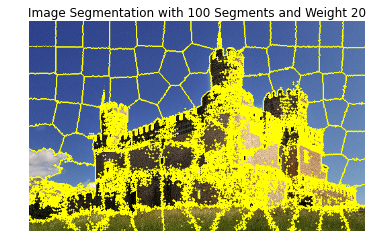

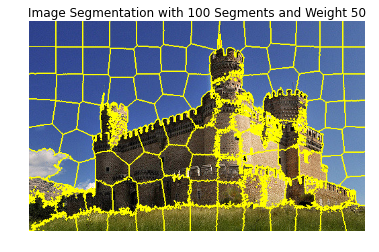

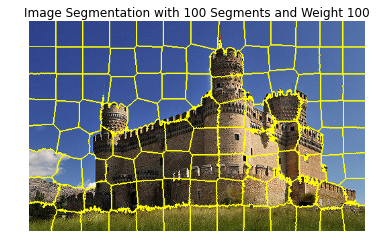

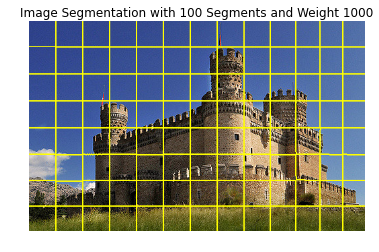

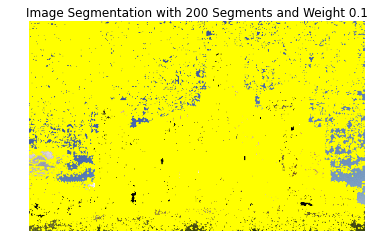

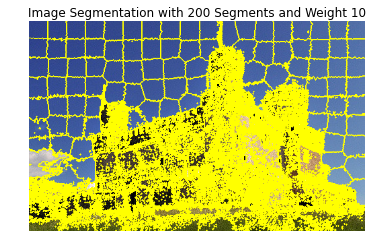

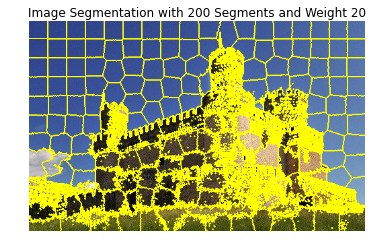

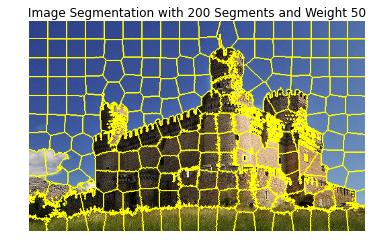

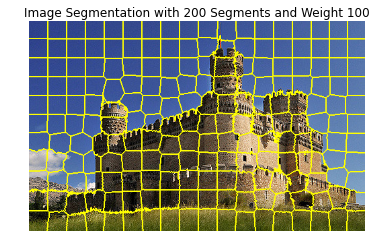

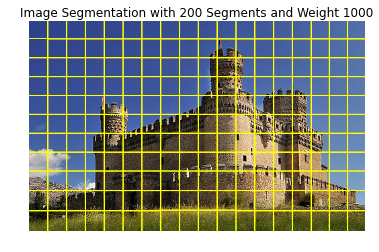

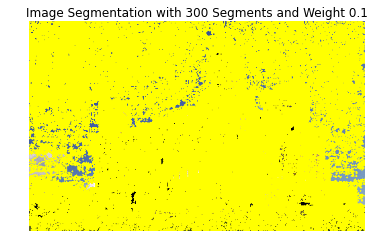

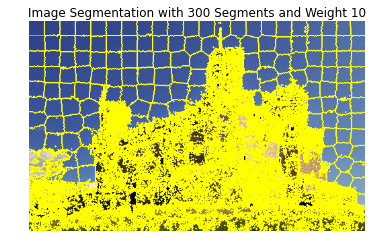

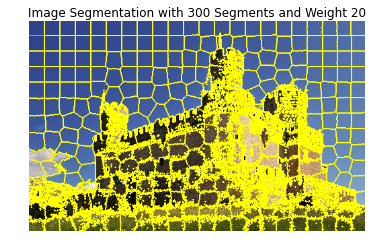

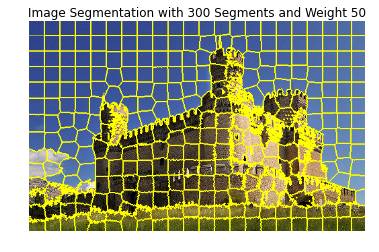

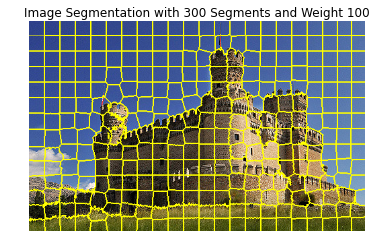

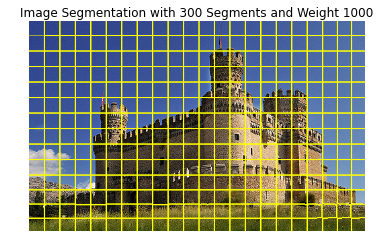

In [100]:
for n_seg in (10,100,200,300):
    for weight in (0.1,10,20,50,100,1000):
        segments = slic(img, n_segments=n_seg,compactness=weight)
        fig = plt.figure()
        plt.title("Image Segmentation with " + str(n_seg) + " Segments and Weight " + str(weight))
        ax = fig.add_subplot(1, 1, 1)
        ax.imshow(mark_boundaries(img, segments))
        plt.axis("off")
    
plt.show()





#4. Heatmap of the differences

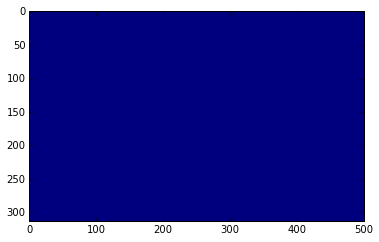

In [111]:
import math
w,h,d = original_shape = img.shape
hmap = np.zeros((w,h))

#Go through image
for i in range(h): 
    for j in range(w): 
        #Calculate score 
        #center refers to region's center
        #ic refer's to y value, jc refers to x value
        hmap[i][j] = math.pow((img[i][j][0]-center[i][j][0]),2)+math.pow((img[i][j][1]-center[i][j][1]),2) + math.pow((img[i][j][2]-center[i][j][2]),2)+ math.pow((i-ic),2) + math.pow((j-jc),2)

plt.imshow(hmap)

#5. Different K-Values

With K = 16
1 loops, best of 3: 283 ms per loop


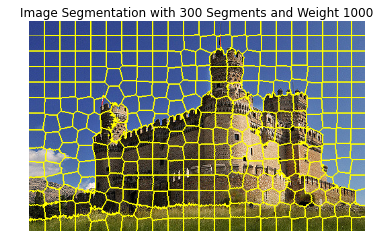

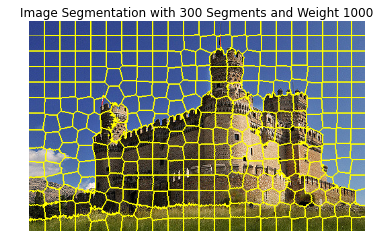

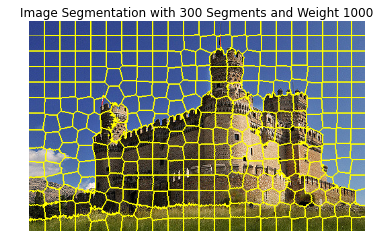

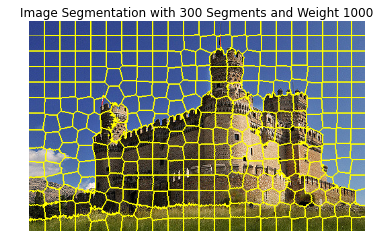

In [106]:
def slicKtimes(k):
    #Assuming 300 segments with weight 100
    segments = slic(img, n_segments=300,compactness=100,max_iter=k)
    fig = plt.figure()
    plt.title("Image Segmentation with " + str(n_seg) + " Segments and Weight " + str(weight))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(img, segments))
    plt.axis("off")
    pass

print("With K = 16")
%timeit slicKtimes(16)


With K = 64
1 loops, best of 3: 810 ms per loop


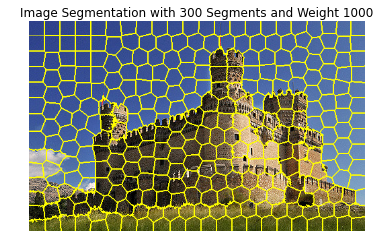

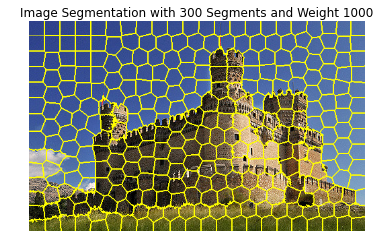

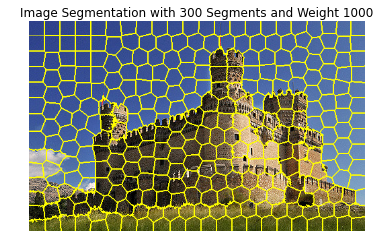

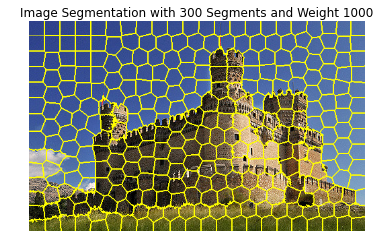

In [107]:
print("With K = 64")
%timeit slicKtimes(64)

With K = 256
1 loops, best of 3: 3.04 s per loop


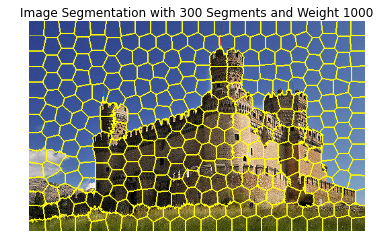

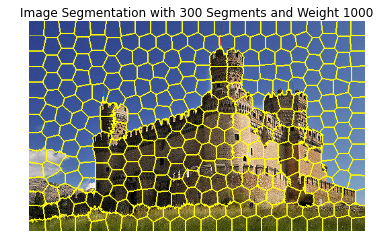

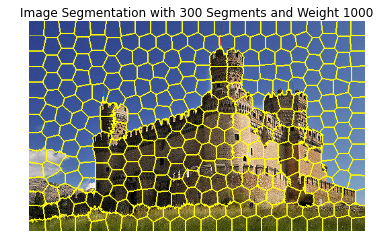

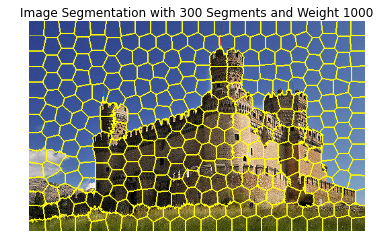

In [108]:
print("With K = 256")
%timeit slicKtimes(256)

With K = 1024
1 loops, best of 3: 12 s per loop


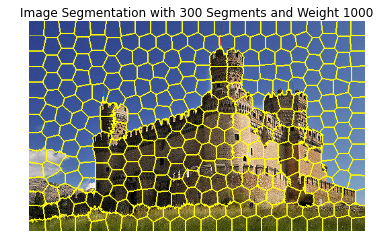

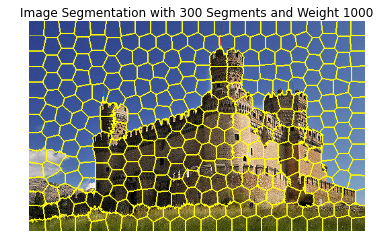

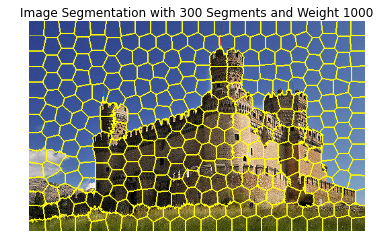

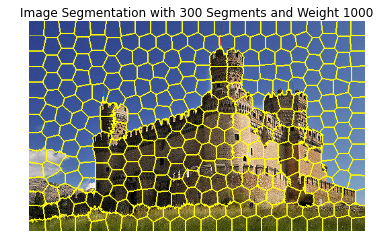

In [109]:
print("With K = 1024")
%timeit slicKtimes(1024)

#6 Boundary Recall 

In [ ]:
from sklearn.metrics import recall_score

#expand ground truth so that it is 3 pixels far from ground truth edge. 
def get_reecall_score(ground_truth_image,segments):
   segmentsExpanded = expand_ground_truth(segments)
   
   recall_score(ground_truth_image, segmentsExpanded, pos_label=1, average='weighted', sample_weight=None)


def expand_ground_truth(segment_image):
   x_dim = segment_image.shape[0]
   y_dim = segment_image.shape[1] 
   groundImage = np.zeros([x_dim,y_dim])
   
   for i in range(2,segment_image.shape[0]-2):
       for j in range(2,segment_image.shape[1]-2):
           if segment_image[i][j] > 0:
               val = segment_image[i][j]
               groundImage[i-2][j] = val
               groundImage[i-1][j] = val
               groundImage[i+1][j] = val
               groundImage[i+2][j] = val
               ##
               groundImage[i][j-2] = val
               groundImage[i][j-1] = val
               groundImage[i][j+1] = val
               groundImage[i][j+2] = val
   return groundImage